In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# 2: Load the Dataset

In [3]:
# Load the dataset
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Display the first 5 rows
print(data.head())

# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check the distribution of the target variable (Class)
print(data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#  3: Exploratory Data Analysis (EDA)
## 3.1: Basic Info and Missing Values

In [4]:
# Basic info
print(data.info())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##  3.2: Distribution of the Target Variable

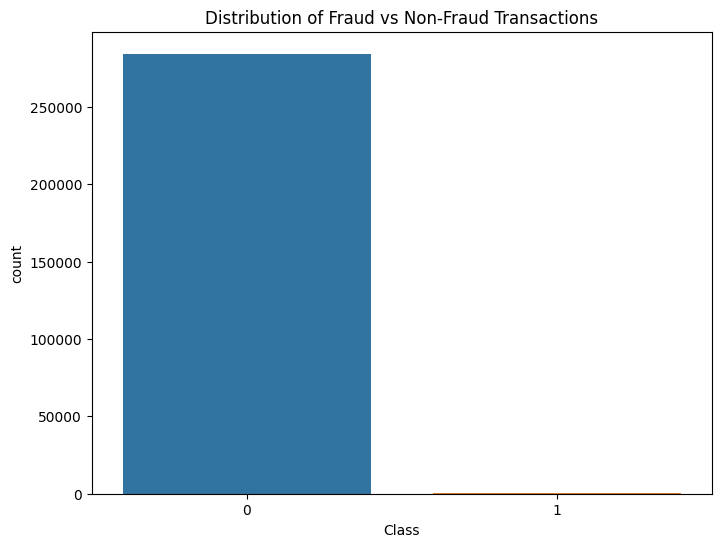

In [5]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

## 3.3: Distribution of Transaction Amount

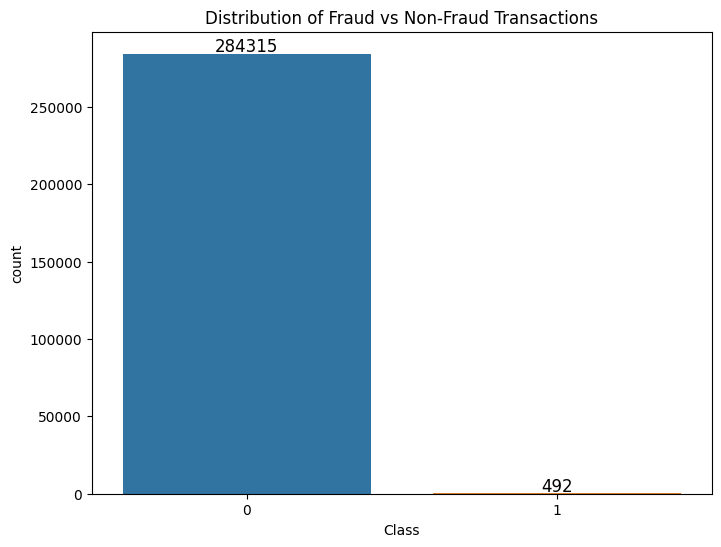

In [6]:
# Distribution of the target variable with count labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=data)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


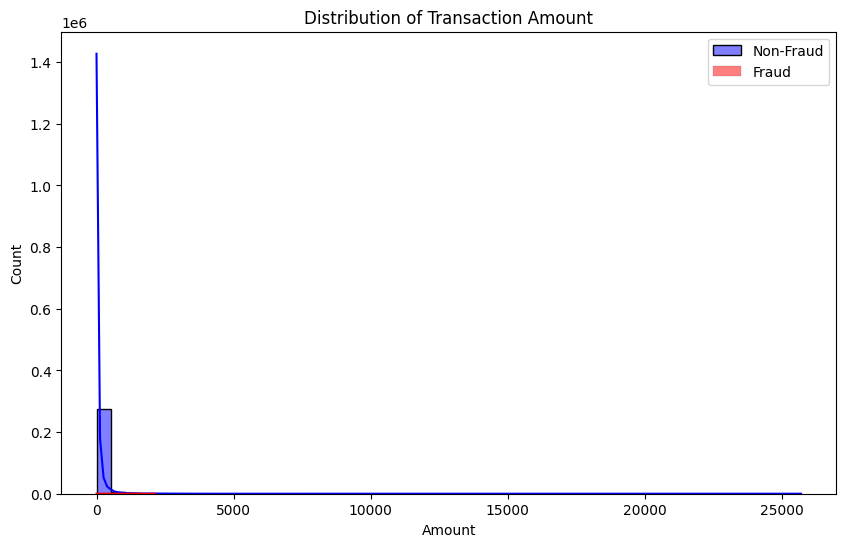

In [7]:
# Distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.title('Distribution of Transaction Amount')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


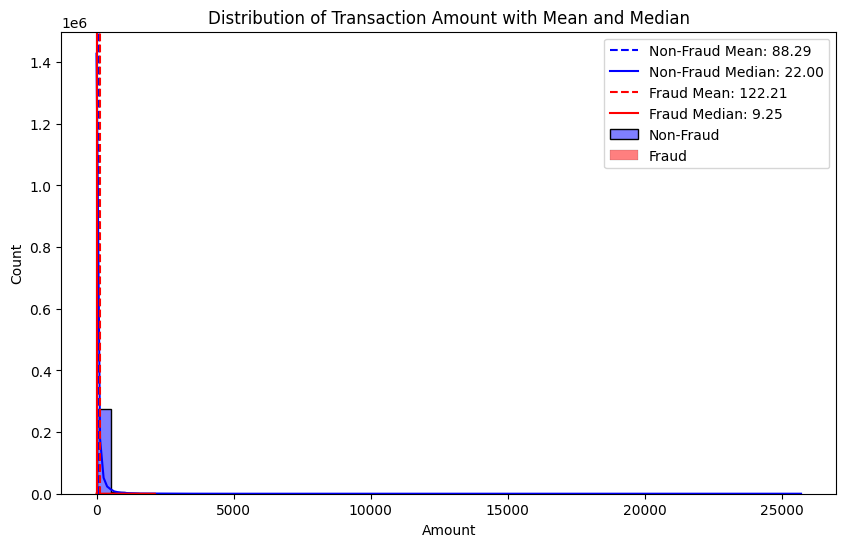

In [8]:
# Calculate mean and median for fraud and non-fraud transactions
non_fraud_mean = data[data['Class'] == 0]['Amount'].mean()
non_fraud_median = data[data['Class'] == 0]['Amount'].median()
fraud_mean = data[data['Class'] == 1]['Amount'].mean()
fraud_median = data[data['Class'] == 1]['Amount'].median()

# Distribution of the 'Amount' feature with annotations
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)

# Add mean and median annotations
plt.axvline(non_fraud_mean, color='blue', linestyle='--', label=f'Non-Fraud Mean: {non_fraud_mean:.2f}')
plt.axvline(non_fraud_median, color='blue', linestyle='-', label=f'Non-Fraud Median: {non_fraud_median:.2f}')
plt.axvline(fraud_mean, color='red', linestyle='--', label=f'Fraud Mean: {fraud_mean:.2f}')
plt.axvline(fraud_median, color='red', linestyle='-', label=f'Fraud Median: {fraud_median:.2f}')

plt.title('Distribution of Transaction Amount with Mean and Median')
plt.legend()
plt.show()

# 4: Data Preprocessing
## 4.1: Separate Features and Target

In [9]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Display the shape of X and y
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (284807, 30)
Target (y) shape: (284807,)


## 4.2: Split the Data into Training and Testing Sets

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training set (X_train) shape: {X_train.shape}")
print(f"Testing set (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

Training set (X_train) shape: (227845, 30)
Testing set (X_test) shape: (56962, 30)
Training target (y_train) shape: (227845,)
Testing target (y_test) shape: (56962,)


## 4.3: Standardize the 'Amount' and 'Time' Features

In [11]:
# Standardize the 'Amount' and 'Time' features
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

# Display the first 5 rows of the standardized training set
print(X_train[['Amount', 'Time']].head())

          Amount      Time
223361 -0.307889  1.022555
165061 -0.167026  0.471283
238186 -0.300043  1.153387
150562  0.113600 -0.023638
138452 -0.246029 -0.255590


# 5: Handle Class Imbalance
## 5.1: Apply SMOTE to Balance the Dataset

In [12]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print(pd.Series(y_train_res).value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


# 6: Build and Evaluate Models
## 6.1: Train a Logistic Regression Model

In [13]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

## 6.2: Make Predictions and Evaluate the Model

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [15]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[55419  1445]
 [    7    91]]


In [16]:

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# Calculate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

ROC-AUC Score: 0.9515799602058043
Precision-Recall AUC: 0.4939695545908008


# 7:Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf}")

# Calculate Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"Precision-Recall AUC (Random Forest): {pr_auc_rf}")

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Random Forest):
[[56856     8]
 [   16    82]]
ROC-AUC Score (Random Forest): 0.9182970036635926
Precision-Recall AUC (Random Forest): 0.8740633470011953
